Importing basic libraries

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Loading ML dedicated libraries

In [2]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv1D, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN


Using TensorFlow backend.


Loading the input file and defining the subsamples

In [4]:
f = np.load("../data/featuresData.npz")
inputData = f["arr_0"]


(69, 1172172)
[[ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]
 [ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]
 [ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]
 ...
 [ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]
 [ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]
 [ 3.76689768 14.06811905 45.62361526 ...  0.          0.
   1.        ]]


In [6]:
print(inputData.shape)
print(inputData[1,-100:-1])

(69, 1172172)
[ 5.26625104e-03  5.88007271e-01  1.90000000e+01  5.00000000e+00
  2.47151614e-03 -5.59507357e-03  4.72383499e-02  1.00000000e+00
  1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  3.56355524e+00
 -9.28851128e+00  3.27700882e+01 -1.00000000e+00  5.63164091e+00
  5.22816086e+00 -2.09325457e+00  6.22608280e+00  5.20559931e+00
 -2.09834504e+00  6.20722818e+00  9.54077721e-01  9.54339802e-01
  3.08297372e+00  2.22063942e+01  2.10223484e+01 -7.15435886e+00
  2.64272652e+01  1.08159523e+01  9.64122963e+00 -4.90219402e+00
  1.30792580e+01  1.00000000e+00  1.02188540e+00  1.16937923e+01
  1.14667625e+01 -2.29306245e+00  1.34647465e+01 -1.00000000e+00
  9.8451328

In [ ]:
inputData = inputData[:,np.logical_or(inputData[13,:],inputData[14,:])]
nn_inputFeatures = inputData[0:10,:]
triggerFlags = (inputData[10:13,:]).astype(int) == 1
channelFlags = (inputData[13,]).astype(int) == 1

In [5]:
print(triggerFlags)
print(np.sum(triggerFlags[1,triggerFlags[0,:]]))

[[False  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
2385


Importing NN libraries

Definition of the model

In [6]:
batch_size = 500
n_epochs = 100
dropoutRate = 0.1

inputLayer = Input(shape=(10,))
x = BatchNormalization()(inputLayer)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(10, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
outputLayer = Dense(1, activation = 'sigmoid')(x)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model = Model(inputs = inputLayer, outputs = outputLayer)
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930 

In [8]:
history = model.fit(np.transpose(nn_inputFeatures), np.transpose(channelFlags), epochs = n_epochs, batch_size = batch_size, verbose = 1,
        validation_split = 0.3, 
        callbacks = [ 
        EarlyStopping(monitor='val_loss', patience=10, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=2, verbose = 1), 
        TerminateOnNaN()])


Instructions for updating:
Use tf.cast instead.
Train on 12672 samples, validate on 5431 samples
Epoch 1/100
12672/12672 [==============================] - 2s 153us/step - loss: 0.6195 - acc: 0.7388 - val_loss: 0.4022 - val_acc: 0.9998
Epoch 2/100
12672/12672 [==============================] - 0s 22us/step - loss: 0.4394 - acc: 0.8592 - val_loss: 0.1711 - val_acc: 0.9998
Epoch 3/100
12672/12672 [==============================] - 0s 18us/step - loss: 0.3627 - acc: 0.8631 - val_loss: 0.1474 - val_acc: 0.9998
Epoch 4/100
12672/12672 [==============================] - 0s 21us/step - loss: 0.3394 - acc: 0.8634 - val_loss: 0.1369 - val_acc: 0.9998
Epoch 5/100
12672/12672 [==============================] - 0s 23us/step - loss: 0.3292 - acc: 0.8636 - val_loss: 0.1363 - val_acc: 0.9998
Epoch 6/100
12672/12672 [==============================] - 0s 17us/step - loss: 0.3266 - acc: 0.8640 - val_loss: 0.1369 - val_acc: 0.9998
Epoch 7/100
12672/12672 [==============================] - 0s 16us/step - 

Plot of the training history

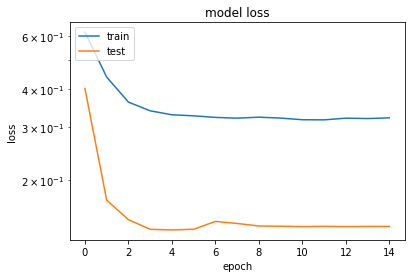

In [9]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()